<a href="https://colab.research.google.com/github/alexey9019/data/blob/master/Copy_of_sem_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Намерения покупателей в онлайне

### Информация о наборе данных: 

набор данных состоит из векторов признаков, принадлежащих 12 330 сеансам. Набор данных был сформирован таким образом, чтобы каждый сеанс принадлежал отдельному пользователю в течение 1 года, чтобы избежать какой-либо тенденции к конкретной кампании, особому дню, профилю пользователя или периоду. 

### Информация об атрибутах: 

Набор данных состоит из 10 числовых и 8 категориальных атрибутов. 

Атрибут «Доход» может использоваться как метка класса. «Административная», «Административная продолжительность», «Информационная», «Информационная продолжительность», «Связанные с продуктом» и «Продолжительность, связанные с продуктом» представляют количество различных типов страниц, посещенных посетителем в этом сеансе, и общее время, проведенное в каждом из эти категории страниц. Значения этих признаков извлекаются из информации URL-адресов страниц, посещенных пользователем, и обновляются в режиме реального времени, когда пользователь выполняет действие, например, переход с одной страницы на другую. 

* «Показатель отказов», «Коэффициент выхода» и «Значение страницы» представляют собой показатели, измеренные с помощью «Google Analytics» для каждой страницы на сайте электронной коммерции. 

* «Показатель отказов» для веб-страницы относится к проценту посетителей, которые заходят на сайт с этой страницы, а затем уходят («отказов»), не вызывая никаких других запросов к аналитическому серверу во время этого сеанса. 

* «Скорость выхода» для конкретной веб-страницы рассчитывается как для всех просмотров страниц на странице, в процентах, которые были последними в сеансе. 

* «Значение страницы» представляет собой среднее значение кол-ва веб-страниц, которые посетил пользователь перед завершением транзакции электронной торговли.

* Функция «Особый день» указывает на близость времени посещения сайта к определенному особому дню (например, Дню матери, Дню святого Валентина), в котором сессии с большей вероятностью будут завершены транзакцией. Значение этого атрибута определяется с учетом динамики электронной торговли, например, продолжительности между датой заказа и датой доставки. Например, для дня Валентина, это значение принимает ненулевое значение между 2 февраля и 12 февраля, ноль до и после этой даты, если оно не близко к другому особенному дню, и его максимальное значение 1 - 8 февраля. 

Набор данных также включает операционные система, браузер, регион, тип трафика, тип посетителя как возвращающегося или нового посетителя, логическое значение, указывающее, является ли дата посещения выходными и месяцем года.

----

In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [0]:
!git clone https://github.com/tixonsit/Sberbank_materials.git

fatal: destination path 'Sberbank_materials' already exists and is not an empty directory.


In [0]:
!ls /content/Sberbank_materials

1.jpg			  online_shoppers_intention.csv  train.csv
2.png			  telecom_churn.csv		 Untitled.ipynb
bank-additional-full.csv  test.csv
data.json		  text.txt


In [0]:
df = pd.read_csv('/content/Sberbank_materials/online_shoppers_intention.csv')

In [0]:
df.head(8)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False


In [0]:
df.shape

(12330, 18)

In [0]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [0]:
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [0]:
df.dropna(inplace=True)

---

Графический анализ

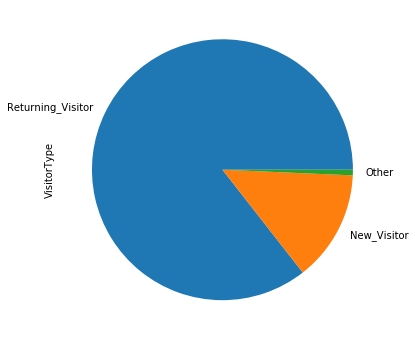

In [0]:
df['VisitorType'].value_counts().plot.pie(figsize = (6, 6))

In [0]:
df._get_numeric_data().columns.shape

(16,)

<string>:6: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



TypeError: ignored

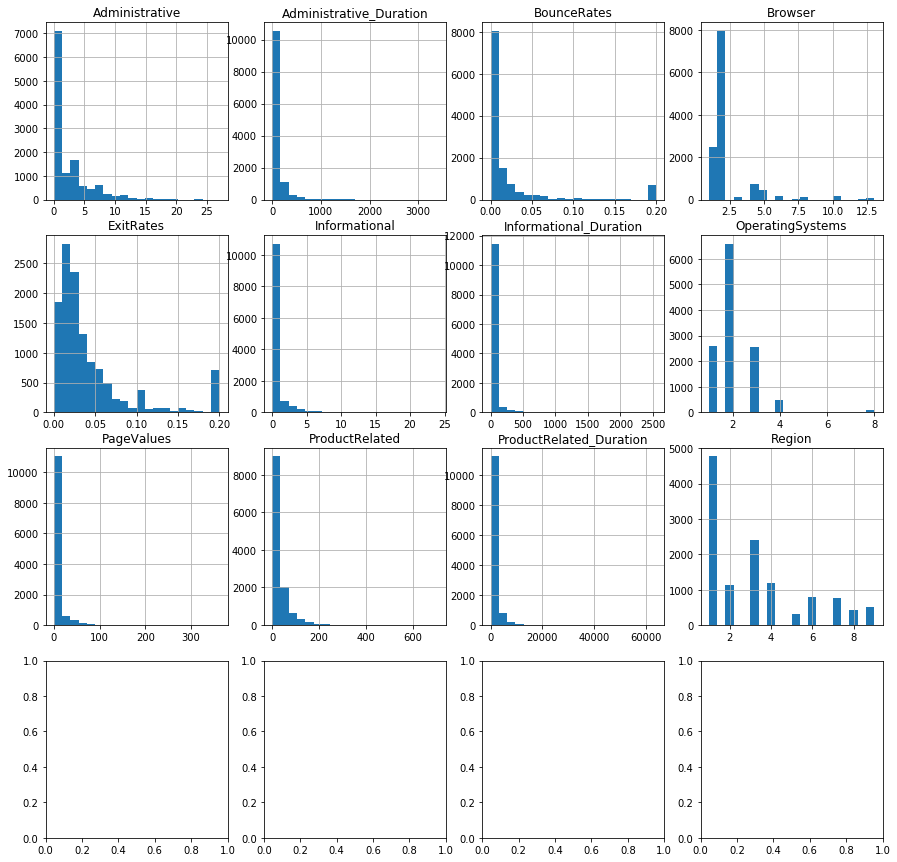

In [0]:
# возьмем числовые колонки и посмотрим на гистограммы
df[df._get_numeric_data().columns].hist(figsize=(15, 15), layout=(4,4), bins=20)

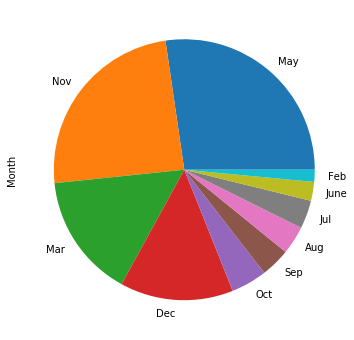

In [0]:
df['Month'].value_counts().plot.pie(figsize = (6, 6))

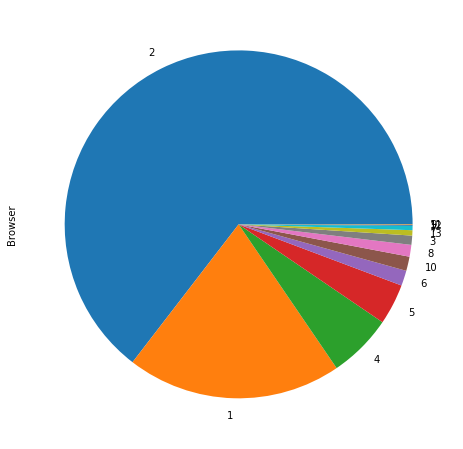

In [0]:
df['Browser'].value_counts().plot.pie(figsize = (8, 8))

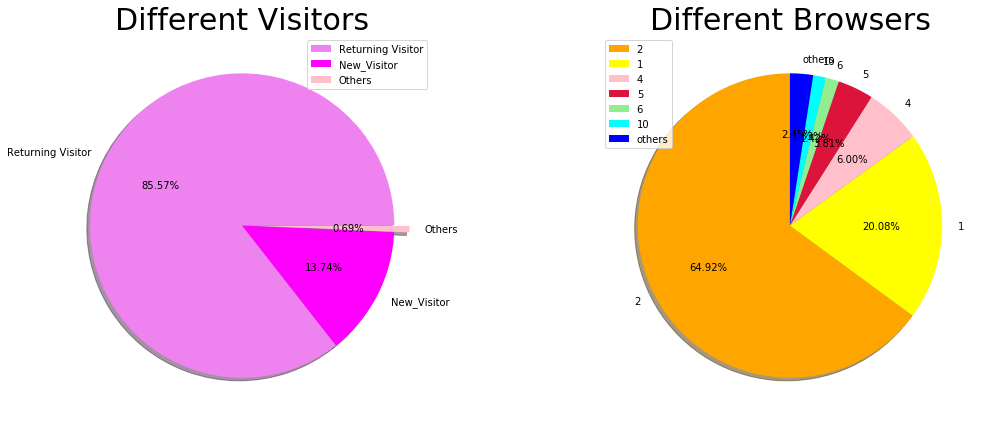

In [0]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300] 
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

----

# Кластерный анализ

Попробуем узнать характеристики пользователя с точки зрения времени, проведенного на сайте

Проведем кластеризацию k-means для различных значений k (1 - 10)

Для каждого k вычислите общую сумму квадрата в кластере (wss).

Постройте кривую wss в соответствии с количеством кластеров k.

Расположение изгиба (колена) на участке обычно рассматривается как показатель соответствующего количества кластеров.

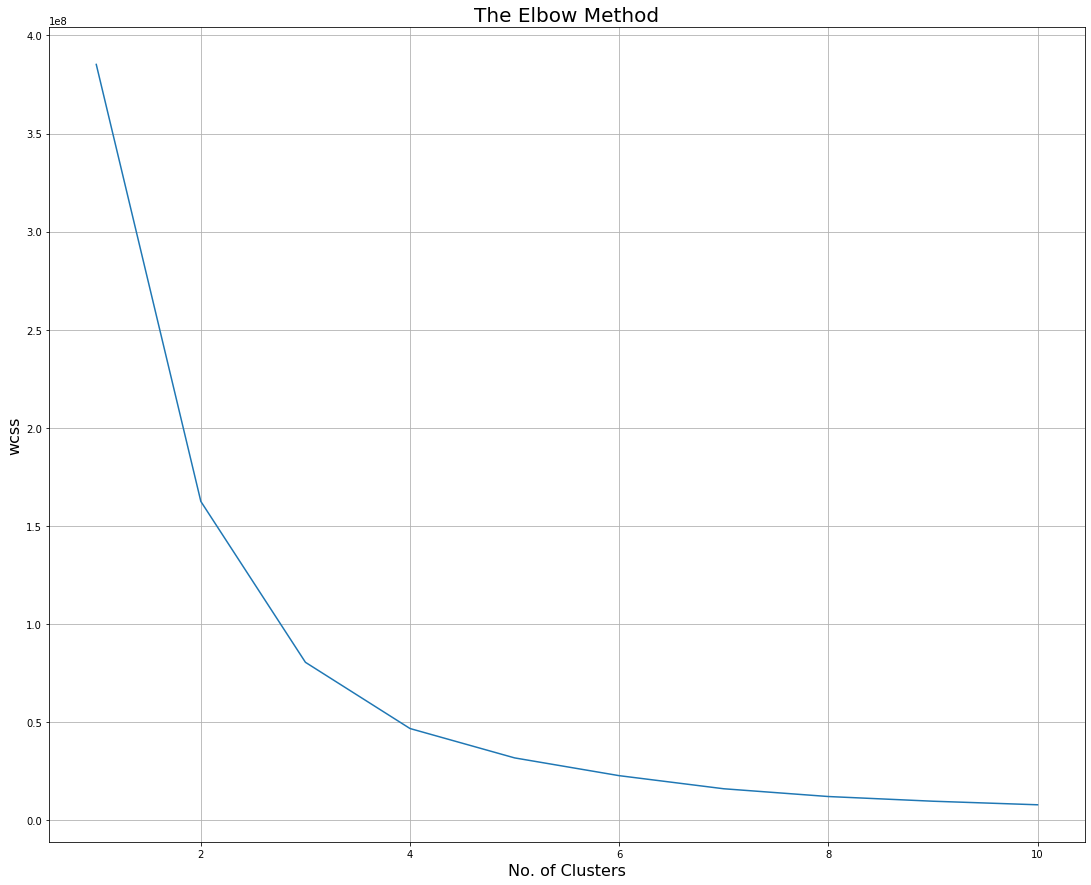

In [0]:
x = df.iloc[:, [1, 6]].values

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 12)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters', fontsize = 16)
plt.ylabel('wcss', fontsize = 16)
plt.show()

Согласно этому графику, максимальный изгиб находится на третьем индексе - число кластеров по продолжительности на сайте. Перейдем к следующему шагу, т. е. построению кластеров.

In [0]:
x

array([[ 0.        ,  0.2       ],
       [ 0.        ,  0.        ],
       [-1.        ,  0.2       ],
       ...,
       [ 0.        ,  0.08333333],
       [75.        ,  0.        ],
       [ 0.        ,  0.        ]])

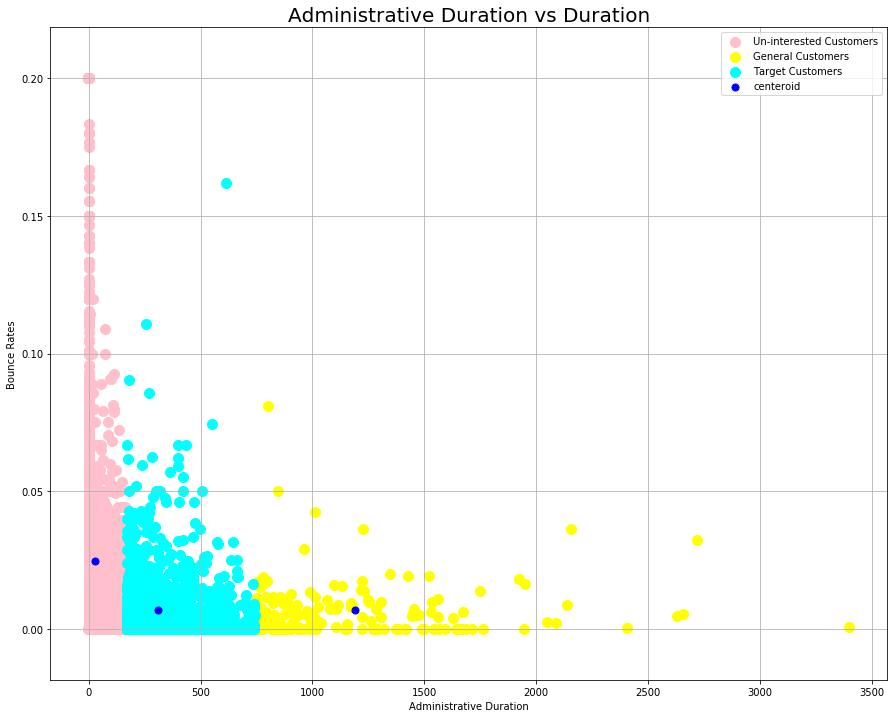

In [0]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

Глядя на этот график кластеризации, мы можем сказать, что клиенты, которые провели более длительную сессию на сайте с меньшей вероятностью уйдут, сравнимо с теми, кто зашел только на ~ одну страницу.

Есть три группы, розовая группа-это группа клиентов, которые остаются на самый короткий срок и имеют самые высокие шансы уйти.

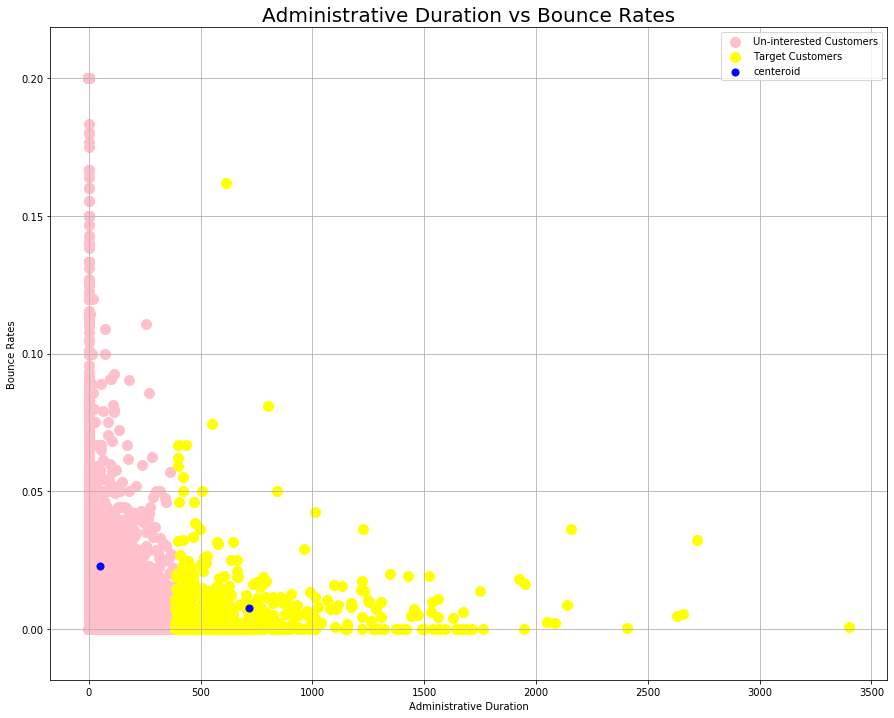

In [0]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [0]:
x

array([[ 0.        ,  0.2       ],
       [ 0.        ,  0.        ],
       [-1.        ,  0.2       ],
       ...,
       [ 0.        ,  0.08333333],
       [75.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [0]:
x[0, 1]

0.2

In [0]:
y_means

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Аналогичное для 2х кластеров (продолжительность сесии | вероятность уйти).

----

# Работа с признаками

In [0]:
# что такое get_dummies?
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [0]:
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [0]:
# label encoding 'revenue'

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Revenue'] = le.fit_transform(df['Revenue'])
df['Revenue'].value_counts()

0    10408
1     1908
Name: Revenue, dtype: int64

In [0]:
pd.get_dummies(df).drop(columns = ['Revenue']).columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [0]:
pd.get_dummies(df).drop(columns = ['Revenue']).columns.shape

(28,)

In [0]:
# getting dependent and independent variables

X = pd.get_dummies(df)

# выделяем обучающую и целевую
X = np.array(X.drop(['Revenue'], axis = 1).values, float)
y = df['Revenue'].values

print("Shape of x:", X.shape)
print("Shape of y:", y.shape)

Shape of x: (12316, 28)
Shape of y: (12316,)


In [0]:
X

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0., -1.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 4., 75.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

In [0]:
y

array([0, 0, 0, ..., 0, 0, 0])

### Балансировка

Балансировка, перемешаем и найдем id "лишних y"

Найдем по y индексы клиентов, которые относятся к классу "ушили"
и, перемешав выборку, обрежем ее до размеров "не ушедших".

In [0]:
# np.argwhere вернет индексы тех элементов массив y, где значение 0
churn_ids = np.argwhere(y == 0).flatten()
print('Всего ушедших', len(churn_ids))
churn_ids

Всего ушедших 10408


array([    0,     1,     2, ..., 12313, 12314, 12315])

Перемешаем массив с выбранным random state (чтоб в дальнейшем у нас совпадали выборки) выберем в нем "лишние" id тех, кто остались (кто портит нам прогноз алгоритма). Кол-во "лишних" = кол-во оставшихся - кол-во ушедшых.

In [0]:
from sklearn.utils import shuffle

churn_ids = shuffle(churn_ids, random_state = 42)
# найдем "лишних", для этого обрежем найденные id на кол-во ушедших (внутри len)
churn_ids = churn_ids[:len(np.argwhere(y == 1).flatten())]
print(len(churn_ids))
# отображаем кол-во и сами id, которые мы должны выкинуть
churn_ids

1908


array([ 4397,  5117, 11343, ...,  8625,  2892, 11938])

In [0]:
y[churn_ids]

array([0, 0, 0, ..., 0, 0, 0])

Проверим, сбалансированны ли классы

по идее кол-во (ушедших) = (оставшихся)

In [0]:
len(np.argwhere(y == 1).flatten()) == len(churn_ids)

True

In [0]:
y[np.argwhere(y == 1).flatten()]

array([1, 1, 1, ..., 1, 1, 1])

Теперь можно выбрать только нужные id с y = 0 и 1

In [0]:
X = X[np.append(churn_ids, np.argwhere(y == 1).flatten())]
y = y[np.append(churn_ids, np.argwhere(y == 1).flatten())]

In [0]:
# отобразим итоговый размер признаков датасета
X.shape, y.shape

((3816, 28), (3816,))

In [0]:
pd.Series(y).value_counts()

1    1908
0    1908
dtype: int64

In [0]:
y = np.array(y, int)
y

array([0, 0, 0, ..., 1, 1, 1])

-----

In [0]:
# train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (3243, 28)
Shape of y_train : (3243,)
Shape of x_test : (573, 28)
Shape of y_test : (573,)


### Нормализация

In [0]:
import sklearn
scaler = sklearn.preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.64030521, -0.30469122,  1.01467513, ..., -0.45352751,
        -0.08597537,  0.46524062],
       [-0.48959291, -0.36424332, -0.44811305, ..., -0.45352751,
        -0.08597537,  0.46524062],
       [-0.77206744, -0.51583047, -0.44811305, ..., -0.45352751,
        -0.08597537,  0.46524062],
       ...,
       [-0.48959291, -0.51583047,  1.01467513, ..., -0.45352751,
        -0.08597537,  0.46524062],
       [ 1.20525428,  0.29817709,  0.28328104, ..., -0.45352751,
        -0.08597537,  0.46524062],
       [ 0.07535615, -0.42920924,  1.74606922, ..., -0.45352751,
        -0.08597537,  0.46524062]])

In [0]:
X.shape, y.shape

((3816, 28), (3816,))

# "Классические" алгоритмы

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

Случайный лес

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Training Accuracy : 0.9919827320382362
Testing Accuracy : 0.8411867364746946
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       291
           1       0.84      0.84      0.84       282

    accuracy                           0.84       573
   macro avg       0.84      0.84      0.84       573
weighted avg       0.84      0.84      0.84       573



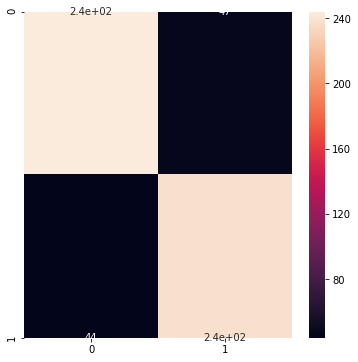

In [0]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Закинули x_train в алгоритм до нормализации

In [0]:
# train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (2671, 28)
Shape of y_train : (2671,)
Shape of x_test : (1145, 28)
Shape of y_test : (1145,)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Training Accuracy : 0.992137776113815
Testing Accuracy : 0.8497816593886462
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       582
           1       0.85      0.84      0.85       563

    accuracy                           0.85      1145
   macro avg       0.85      0.85      0.85      1145
weighted avg       0.85      0.85      0.85      1145



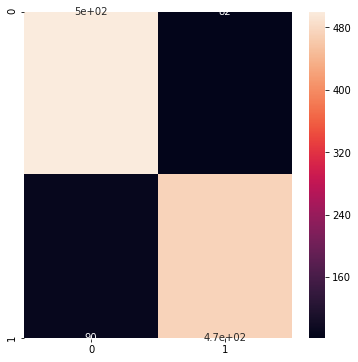

In [0]:

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Найдем оптимальнее!

In [0]:
# knn_grid = {'n_neighbors': np.array(np.linspace(1, 100, 100), dtype='int')}

param_grid = {'max_depth': [i for i in range(10, 20)],
              'min_samples_split': [i for i in range(10, 25)],
              'max_features': [2, len(X[0])-1]
              }
alg = RandomForestClassifier()
gs = GridSearchCV(alg, param_grid, cv=5)
gs.fit(X, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
print()
gs.best_params_, gs.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



({'max_depth': 19, 'max_features': 2, 'min_samples_split': 19},
 0.8110587002096437)

Результаты кросс валидации дают нам результаты хуже

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Training Accuracy : 0.9105204043429427
Testing Accuracy : 0.8489082969432314
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       582
           1       0.83      0.88      0.85       563

    accuracy                           0.85      1145
   macro avg       0.85      0.85      0.85      1145
weighted avg       0.85      0.85      0.85      1145



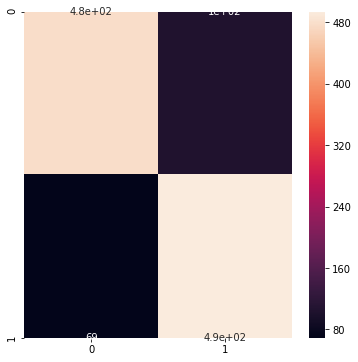

In [0]:
# А если на тесте с наилучшими параметрами?
model = RandomForestClassifier(max_depth= 19, min_samples_split= 19, max_features=2)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Результаты в переборе выбираются по самому высокому acc, всегда надо смотреть, возможно автоматический поиск выдаст параметры лучше. Надо помнить про weighted f1

----

Найдем самые важные признаки

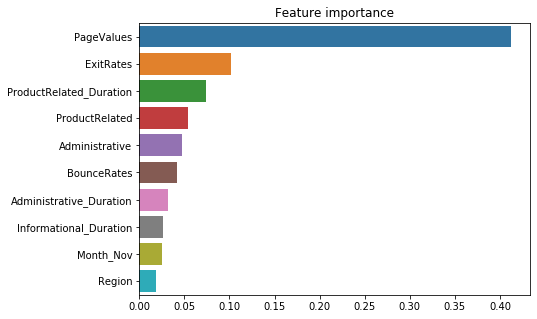

In [0]:
def plot_feature_importances(model, columns):
    nr_f = 10
    imp = pd.Series(data = model.best_estimator_.feature_importances_, 
                    index=columns).sort_values(ascending=False)
    plt.figure(figsize=(7,5))
    plt.title("Feature importance")
    ax = sns.barplot(y=imp.index[:nr_f], x=imp.values[:nr_f], orient='h')

# из исходного датасета взяли dummies и выкинули целевую, получили названия колонок для понимания наилучших признаков
plot_feature_importances(gs, pd.get_dummies(df).drop(columns = ['Revenue']).columns)